In [1]:
pwd()

"/Users/kyan/Projects/qgplsim"

# Start

In [100]:
# run this ceil if source codes was edited
include("DGP.ji")
# include("qgplsim.ji")
include("MonteCarloSIM.ji")
using Statistics, LinearAlgebra, Clustering
using LaTeXStrings, Plots

import Base.Threads.@threads

# QGPLSIM fitting

In [102]:
# run this ceil for different data sets

α = [1.0, 0.5] # single index for x
θ = [0.5, -1.0]  # linear for x, <α, θ> = 0 for identification
γ = [1.0, 0.5] # single index for z
β = [0.5, -1.0] # linear for z
# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)

n = 500
fx = 2 # y = f(x), fx for different f(x)     
                # fx = 1, y = X*θ + Z*β + (X*α + Z*γ .- 1).^2 + 0.2ϵ
                # fx = 2, y = X*θ + Z*β + log.(1 .+ exp.(X*α + Z*γ .- 1)) + 0.2ϵ

ifz = true # if false, Z = 0, i.e. no category varible
dist = 1 # 0 for gauss, 1 for Cauchy
X, Z, y = dgp(n, γ, θ, α, β, fx, dist,  ifz)
# p = length(α)
# q = length(γ)
τ = 0.5

# Estimation 

model1 = qgplsim.model(X, Z, y, τ)
alpha_type = 1
# different weight of sum on alpha 
# 0 for true alpha, using α in DGP
# 1 for global: ∑ij sum(Bi - Bj) / n;
# 2 for local: ∑z ∑ij (bzi - bzj) * nz / n;
# when Z = 0, global == local
@time alpha1, gamma, theta, beta = qgplsim.estimator(model1, alpha_type)
coefa = 1 #/ alpha[1]
coefg = 1 #/ gamma[1]
println("Estimation of index coefs: ")
println("̂α => ", coefa * alpha1)
println("̂γ => ", gamma)

println("Estimation of linear coefs: ")
println("̂θ => ", theta)
println("̂β => ", beta)

# theta * alpha

width in alpha :[1.0255800103998314, 1.0255800103998314]
width in alpha :[0.9005333231349373, 0.9005333231349373]
width in alpha :[0.894427190999916, 0.894427190999916]
width in alpha :[0.9923941493157113, 0.9923941493157113]
width in alpha :[1.0108144784568882, 1.0108144784568882]
width in alpha :[0.9783093081324276, 0.9783093081324276]
first v: -2.2701355828576304 0.6214125737328751
final c: 0.42327553871429047 0.6248014402942762
final v: -2.2701355828576304 0.6214125737328751
6
  2.404605 seconds (2.31 M allocations: 9.749 GiB, 11.45% gc time)
Estimation of index coefs: 
̂α => [0.934787354885376; 0.35520782810405793]
̂γ => [1.1759224996554403, 0.6746435876777089]
Estimation of linear coefs: 
̂θ => [0.3842533109940998 -1.0112252821322856]
̂β => [0.37224479856209663, -1.6273889058569355]


# Paths of $g(x \alpha + z \gamma)$ and $\nabla g$

$\alpha = \hat{\alpha}$,
$z \in S_z$

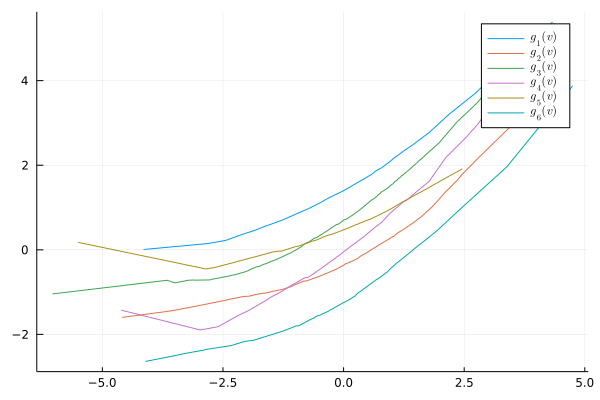

In [103]:
alphap = 1.0 * alpha1
v = X * alphap # g(Xα + Zγ) => univar func. g(v + zγ) after α was determined and  Z = z
categ, index = model1.categ, model1.index
g, dg = qgplsim.Gz_DGz(v, Z, y - X * transpose(theta), 0.5, -0.4) # g: g(v), dg: g'(v)
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]

    plot!(fig, sorted_vm, sorted_gm, label = L"g_{%$m} (v)")

end
fig

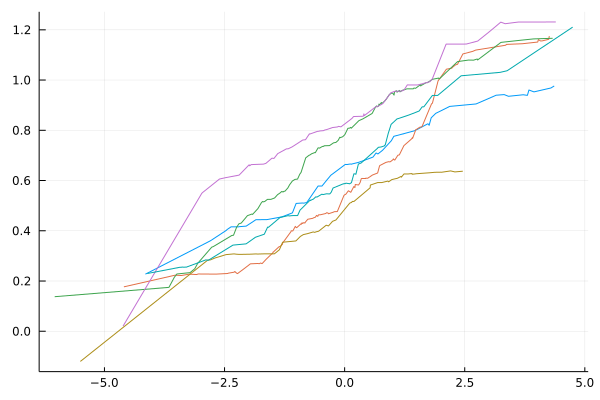

In [104]:
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_vm = vm[indm]
    plot!(fig, sorted_vm, sorted_dgm, label = false )#L"\nabla g_{%$m} (v)")

end
fig

# Monte Carlo Simulation

In [40]:
Threads.nthreads()

4

In [122]:
include("MonteCarloSIM.ji")

main (generic function with 4 methods)

In [129]:
α = [1.0, 0.5] # single index for x
θ = [1.0, -2.0]  # linear for x, <α, θ> = 0 for identification
γ = [0.5, 1.0] # single index for z
β = [1.0, -0.5] # linear for z
# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)
n = 600
fx = 1
dist = 1 # Cauchy
rep = 20 # MC rept. times

20

In [130]:
Alpha, Gamma, Theta, Beta = MonteCarlo(n, γ, θ, α, β, fx, dist, rep)
mean(Gamma, dims = 1)

first v: -1.2219715059364167 1.5309034233504928
final c: 0.8148287887600256 1.2298313295521859
final v: -1.2219715059364167 1.5309034233504928
6
first v: -1.3182796365584097 3.1101106895132764
final c: 1.1979905617165827 3.6731117526479973
final v: -1.3182796365584097 3.1101106895132764
6
first v: -1.1679225611982704 1.5257135209200001
final c: 1.3540284180202748 1.542860736394898
final v: -1.1679225611982704 1.5257135209200001
6
first v: -0.9337539682321365 1.57897333669596
final c: 1.2108736032507512 1.3615929178269355
final v: -1.1003918341392493 1.7456112026030728
6
first v: -1.3063206066698996 1.8788753948615637
final c: 0.8471236338719788 1.3469622592102604
final v: -1.3063206066698996 1.8788753948615637
6
first v: -1.235351929084662 1.2658521649667833
final c: 0.06390509993082485 0.707777332219176
final v: -1.3234788500152344 1.3539790858973557
6
first v: -2.800021621631206 1.5491379557677971
final c: -3.2800250906980417 1.0502111398452054
final v: -2.800021621631206 1.549137955

1×2 Matrix{Float64}:
 0.63952  1.33792

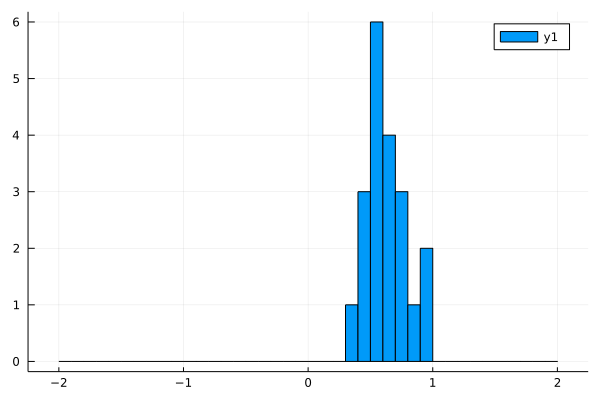

In [131]:
histogram(Gamma[:,1], bins = -2:0.1:2)

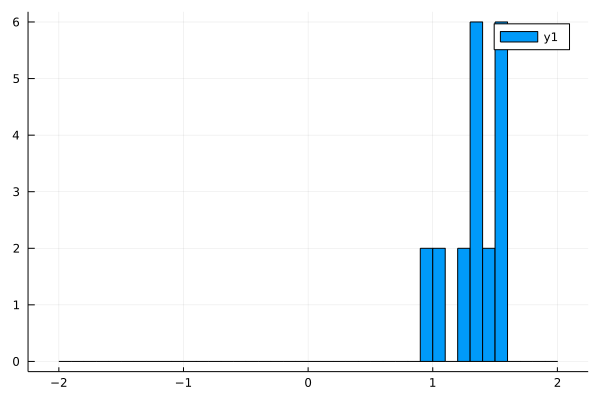

In [132]:
histogram(Gamma[:,2], bins = -2:0.1:2)

In [133]:
ma = mean(Alpha, dims = 1)

1×2 Matrix{Float64}:
 0.899122  0.436056

In [134]:
mb = mean(Beta, dims = 1)

1×2 Matrix{Float64}:
 2.32347  0.763454

In [118]:
mt = mean(Theta, dims = 1)

1×2 Matrix{Float64}:
 1.02975  -1.98954

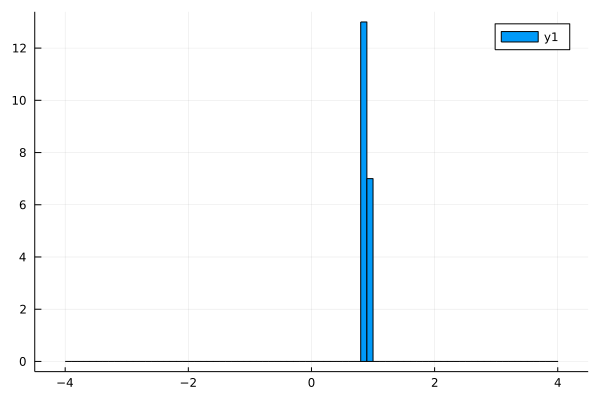

In [119]:
histogram(Alpha[:,1], bins = -4:0.1:4)

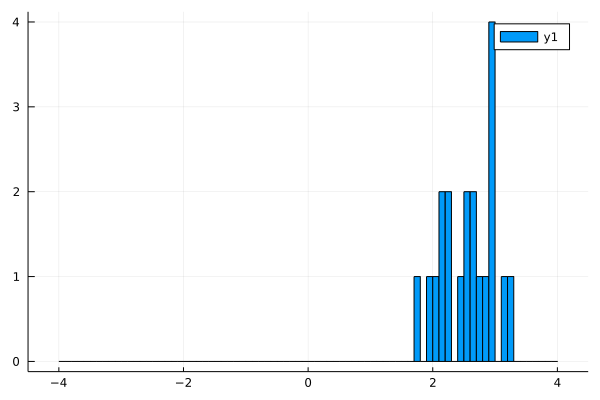

In [121]:
histogram(Beta[:,1], bins = -4:0.1:4)